In [ ]:
# Librerías 
import numpy as np 
import scipy.special as sp
from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 
plt.rcParams['figure.figsize'] = 15,10
font = {'weight' : 'bold',
        'size'  :15}

matplotlib.rc('font', **font)


# Taller # 4 óptica

## Punto 4.4: 

### punto 4.4 parte a) 

Text(0.5, 0, 'x (m)')

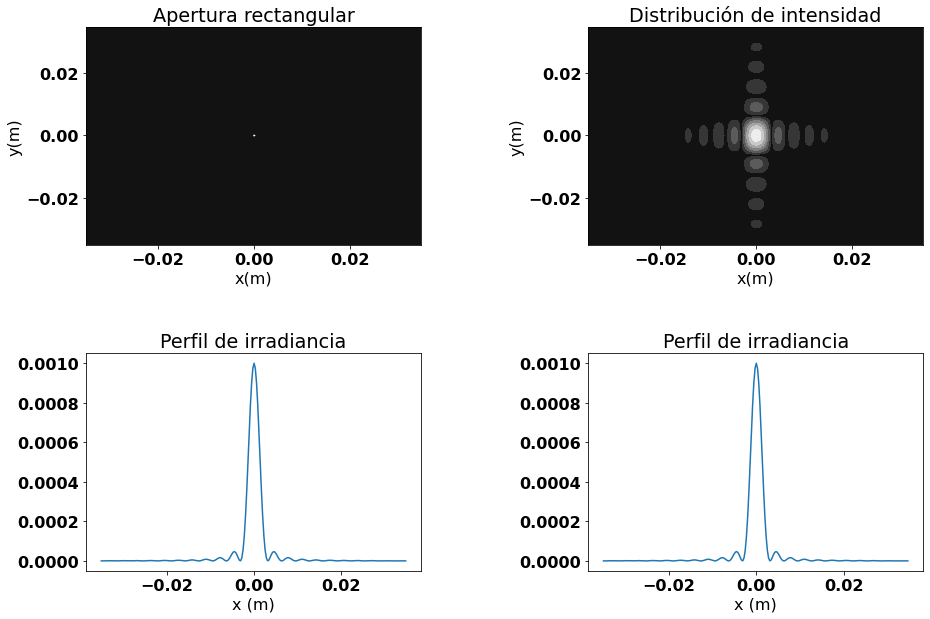

In [ ]:
def rect(x): 
  return abs(x)<= 1/2 

L = 0.07
M = 250 
dx = L/M #Muestreo en x
dy = L/M #Muestreo en y
x = np.arange(-L/2,L/2, dx)
y = np.arange(-L/2,L/2, dy)

xx, yy = np.meshgrid(x,y) #Matriz


wx = 0.1e-3 #Medio ancho en eje x
wy = 0.05e-3  #medio ancho en eje y
l_onda = 0.633e-6 #Longitud de onda
z = 1 #Distancia de propagación, en los calculos se cumple para z>0.15 m 
k = 2*np.pi/l_onda  #Número de onda

#definimos la función rect
f = rect(xx/(2*wx))*rect(yy/(2*wy))
#Distribución de intensidad

I = (((4*wx*wy)/(l_onda*z))**2) * ((np.sinc((2*wx*xx)/(l_onda*z)))**2) * ((np.sinc((2*wy*yy)/(l_onda*z)))**2)

#Graficación 


font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(15,10))
fig2.subplots_adjust(wspace=0.5,hspace=0.5)


plt.subplot(2, 2, 1)
plt.contourf(x,y,f, cmap=cm.gray)
plt.title('Apertura rectangular')
plt.xlabel('x(m)')
plt.ylabel('y(m)')


plt.subplot(2, 2, 2)
plt.contourf(x,y,I**(1/3), cmap=cm.gray)
plt.title('Distribución de intensidad')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

plt.subplot(2, 2, 3)
plt.plot(x,I[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

plt.subplot(2, 2, 4)
plt.plot(y,I[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

### Punto 4.4 b) 

Utilizamos la implementación con funciones de Bessel 

Text(0.5, 0, 'x (m)')

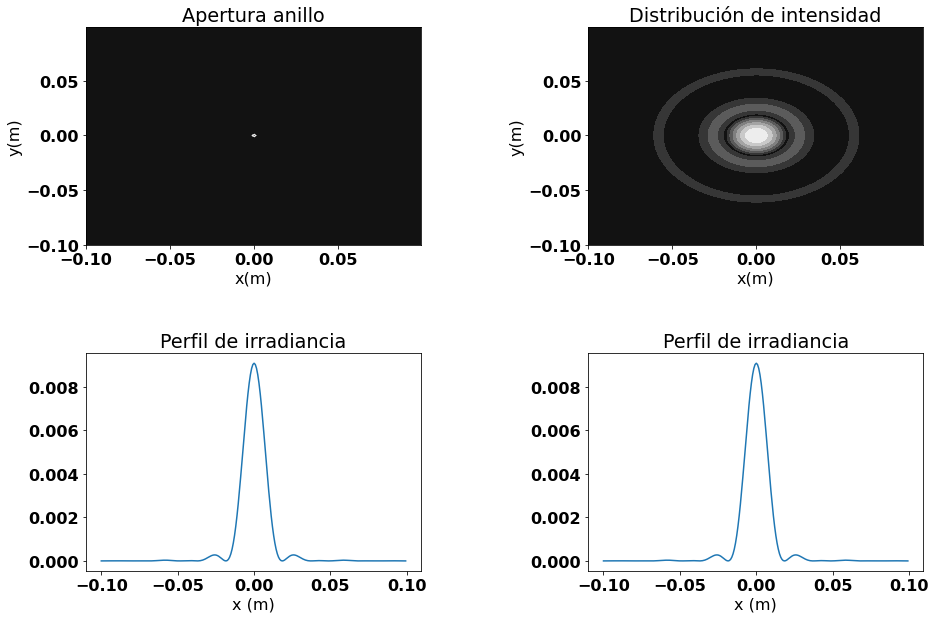

In [ ]:
L = 0.2
M = 250 
dx = L/M
dy = L/M
x = np.arange(-L/2, L/2,dx)
y = np.arange(-L/2, L/2,dy)

xx, yy = np.meshgrid(x,y)

w1 = 1e-3
w2 = 0.2e-3
l_onda = 0.633e-6
z = 50 #El calculo nos dio para z>15.8

#Función circ, utilizó la de la solución tarea 3
def circ2D(x,y,d): # FUNCION circulo EN 2D
        s=np.zeros([len(x),len(y)])
        s[x**2+y**2<d**2]=1.0
        s[x**2+y**2==d**2]=0.5
        return s

g1 = circ2D(xx,yy,w1) #Función circ para w1 
g2 = circ2D(xx,yy,w2) #Función circ para w2
g = g1 - g2

#Irrandiancia 
I = 1/(xx**2 + yy**2) * ( w1*sp.j1(2*np.pi*w1*np.sqrt(xx**2 + yy**2)/(l_onda*z)) - w2*sp.j1(2*np.pi*w2*np.sqrt(xx**2 + yy**2)/(l_onda*z)) )**2      

#Graficación 


font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(15,10))
fig2.subplots_adjust(wspace=0.5,hspace=0.5)


plt.subplot(2, 2, 1)
plt.contourf(x,y,g, cmap=cm.gray)
plt.title('Apertura anillo')
plt.xlabel('x(m)')
plt.ylabel('y(m)')


plt.subplot(2, 2, 2)
plt.contourf(x,y,I**(1/3), cmap=cm.gray)
plt.title('Distribución de intensidad')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

plt.subplot(2, 2, 3)
plt.plot(x,I[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

plt.subplot(2, 2, 4)
plt.plot(y,I[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

### Punto 4.c) 

Text(0.5, 0, 'y (m)')

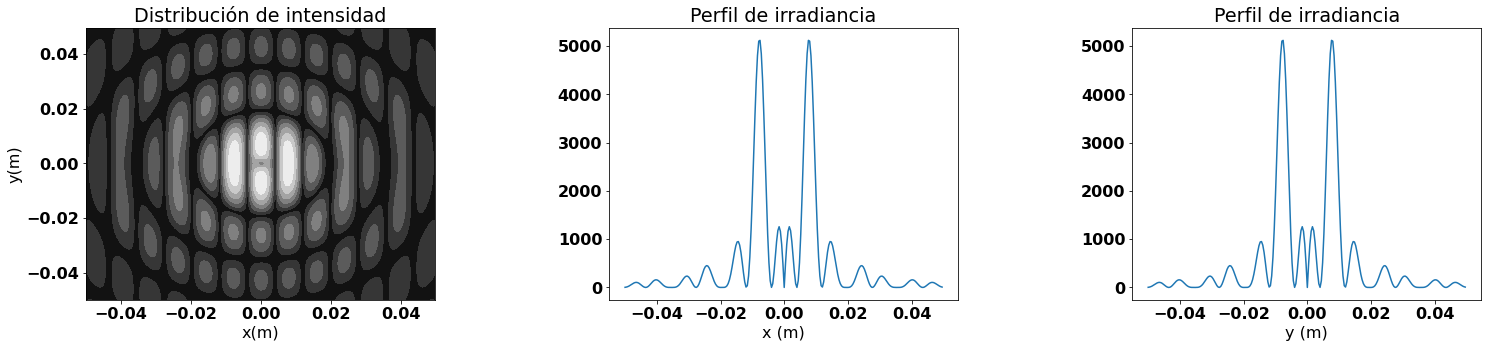

In [ ]:
L = 0.1
M = 250
dx = L/M
dy = L/M
x = np.arange(-L/2, L/2,dx)
y = np.arange(-L/2, L/2,dy)

xx, yy = np.meshgrid(x,y)

w = 1e-3
ds = 4e-3
l_onda = 0.633e-6
z = 50 

# Irradiancia: 
# Implementamos la del libro que es la misma obtenida en la tarea. 
p = l_onda*z 

I3 = ((2/p)**2)*( (w**2)* (sp.j1(2*np.pi*w*np.sqrt(xx**2 + yy**2)/p))**2 * (np.cos(np.pi*ds*xx/p))**2)/(w*np.sqrt(xx**2 + yy**2)/p)




font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(25,5))
fig2.subplots_adjust(wspace=0.5,hspace=0.5)

plt.subplot(1, 3, 1)
plt.contourf(x,y,I3**(1/3), cmap=cm.gray, extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distribución de intensidad')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

plt.subplot(1, 3, 2)
plt.plot(x,I3[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

plt.subplot(1, 3, 3)
plt.plot(y,I3[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('y (m)')

## Punto 4.5

Text(0.5, 0, 'y (m)')

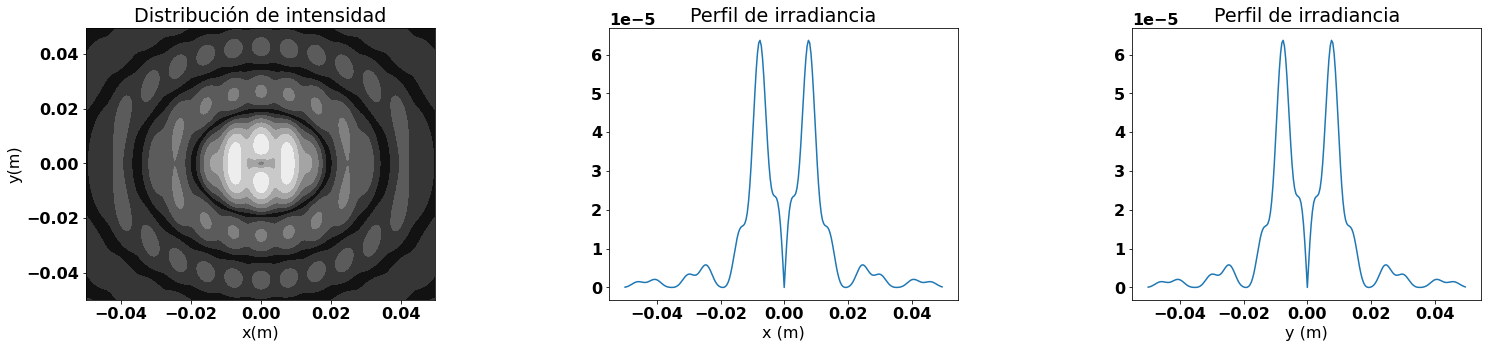

In [ ]:
L = 0.1
M = 250
dx = L/M
dy = L/M
x = np.arange(-L/2, L/2,dx)
y = np.arange(-L/2, L/2,dy)

xx, yy = np.meshgrid(x,y)

A1 = 1 
A2 = 0.4 
w = 1e-3
ds = 4e-3
l_onda = 0.633e-6
z = 50 

I4 = ((A1**2 + A2**2)*(w**2)*(sp.j1(2*np.pi*w*np.sqrt(xx**2 + yy**2)/p))**2 * (1 + (A1*A2/(A1**2 + A2**2)) * np.cos(2*np.pi*xx*ds/p)))/(np.sqrt(xx**2 + yy**2))

font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig2 = plt.figure(figsize=(25,5))
fig2.subplots_adjust(wspace=0.5,hspace=0.5)

plt.subplot(1, 3, 1)
plt.contourf(x,y,I4**(1/3), cmap=cm.gray, extent=[-L/2,L/2,-L/2,L/2])
plt.title('Distribución de intensidad')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

plt.subplot(1, 3, 2)
plt.plot(x,I4[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('x (m)')

plt.subplot(1, 3, 3)
plt.plot(y,I4[round(M/2),:])
plt.title('Perfil de irradiancia')
plt.xlabel('y (m)')